# Data Analysis Project 
---

**Project Title:** Numerical Integration of Total Pressure Recovery of a Hypersonic Flow Using Python

---

## Project Description
Supersonic Combustion Ramjet (Scramjet) has recently drawn the attention of scientists and researchers due to its absence of moving parts and high speed (**Mach 5 or above**). Both numerical and experimental approaches have been taken over the years to test and develop such speedy vehicles. This project deals with such numerical simulation data ( simulation of the Scramjet combustor's flow field was performed on ***ANSYS Fluent 22.0*** ).

#### Project Goal:
The aim of this protect is to explore the ```thrust scenerio``` of a Scramjet using the simulation data of its ignition chamber.

#### Project Outlines:
- To take input of the simulation data. 
- To manipulate the input data.
- To perform numerical integration using integral equation used by Drozda et al. (Tomasz G. Drozda, Jacob J. Lampenfield, Rohan Deshmukh, Robert A. Baurle and J. Philip Drummond.) [Source](https://doi.org/10.2514/6.2019-0130).
- To show the output result of the numerical integration.
- To visualize it to get a clear picture about pressure recovery by which thrust scenerio can be elucidated.

## Problem Solution Approach
We are going to use the six phases of Data Analytics process, such as, **Ask, Prepare, Process, Analyze, Share** and **Act** to achieve the project goal. 

### 1. Ask ( Problem Definition):
The problem in this project is to ```evaluate the thrust scenerio``` which means to identify if there is more pressure loss in the ignition chamber or less. If the pressure loss is greater, in that case, at the end location of ignition chamber, the pressure difference between that point or location with the atmospheric pressure will be less. As a result, the scramjet will produce less thrust since thrust in the air vehicle depends on pressure difference. To illustrate the problem definition, let us observe the image below.

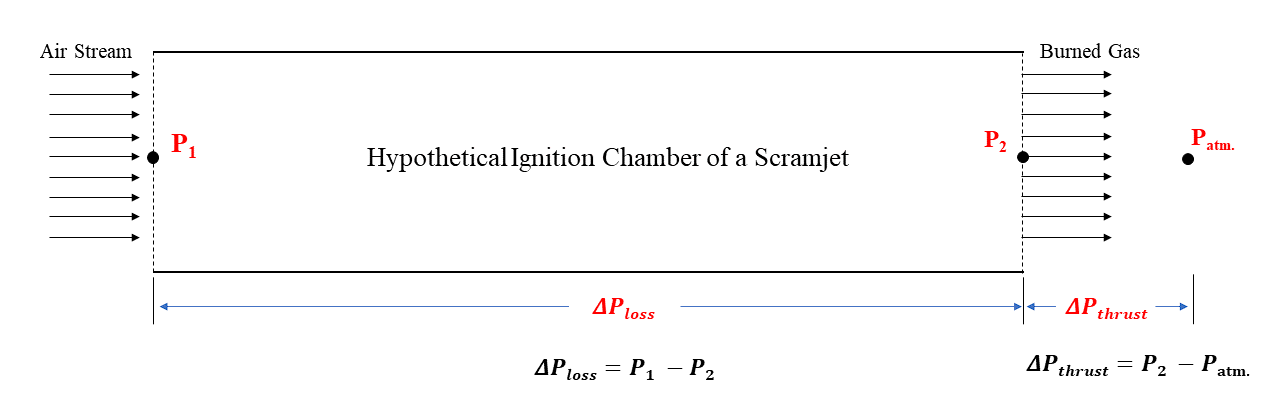

The total pressure at the entrance and exit of the ignitor are $P_1$ and $P_2$ respectively. Now, pressure $P_1$ is the reference pressure (assumed to be constant). Hence, if pressure loss at the ignition room $\Delta {P_{loss}}$ increases, then $P_2$ decreases. Again, since $P_{atm}$ is a constant value close to 101.325 kPa, therefore, if the magnitude of $P_2$ reduces, then $\Delta {P_{thrust}}$ also decreases. Thrust(Driving Force) on the scramjet is directly proportional to the $\Delta {P_{thrust}}$.

Let us depict the scenerio with some values. The values have been chosen randomly and the thrust value has been taken 0.5 times of thrust pressure loss. In the real world, the values would vary. However, this will make our conception clear.

In [1]:
# importing modules

from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact,IntSlider,interactive,interactive_output

# Define each variables with slider values

p1 = widgets.FloatSlider(min=10000,max=30000,step=1000,value=20000,description='P1')
p2 = widgets.FloatSlider(min=1000,max=5000,step=100,value=2000,description='P2')
p3 = widgets.FloatSlider(min=100, max = 102, step = 0.125, value = 101.325,description='Patm.')
print("Change the values in P1, P2 and Patm to see it in action. [ Pressure unit : kPa ]")
w = widgets.HBox([p1,p2,p3])
    
p4 = widgets.FloatText(description='$\Delta P_{loss}$')
p5 = widgets.FloatText(description='$\Delta P_{thrust}$')
p6 = widgets.FloatText(description='$Thrust$')
z = widgets.HBox([p4,p5,p6])

def thrust_observer(a1,b1,c1):
    d1 = a1-b1
    e1 = b1-c1
    t1 = 0.5*e1
    p4.value = d1
    p5.value = e1
    p6.value = t1

result= interactive(thrust_observer, a1=p1, b1=p2, c1=p3)

display(w,z)


Change the values in P1, P2 and Patm to see it in action. [ Pressure unit : kPa ]


### 2. Prepare ( Collection of Data ):
In this phase of data analysis, analysts collect relevent data. Luckily for us, we already have the simulation dataset.

### 3. Process ( Cleaning, Removing Inaccuacies or Duplicates, Formatting,  or Manipulating Data ):
In the third phase of data analysis, we will prepare the simulation data for numerical integration model. We will clean the data by removing null values or duplicate values. Then we will sort the data and format the dataset properly so that it is ready to be fed into the model. Let's take a step-by-step approach.
Firstly, let us import the python libraries and create a DataFrame from simulation dataset.

In [2]:
# Importing all python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Reading csv file and creating DataFrame

initial_data = pd.read_csv("E:/All/Codes/PR120P.csv")
initial_data


,x_coordinate,y_coordinate,density,x_velocity,f_h2,Total_Pressure,Mach,f_air
0,0.121259,0.002284,0.297909,2688.629639,1.145280e-04,3.575866e+07,4.287759,0.999885
1,0.120993,0.002284,0.299933,2687.856445,1.149930e-04,3.580952e+07,4.282809,0.999885
2,0.121259,0.002160,0.297353,2687.101563,1.099640e-04,3.533384e+07,4.279319,0.999890
3,0.120993,0.002160,0.299370,2686.313965,1.103610e-04,3.538020e+07,4.274288,0.999890
4,0.121259,0.002405,0.298466,2690.105225,1.193370e-04,3.618473e+07,4.296156,0.999881
...,...,...,...,...,...,...,...,...
120476,0.200000,0.020000,0.119235,0.000000,6.617128e-03,2.405563e+05,0.398403,0.993383
120477,0.200000,0.000000,0.571604,2525.432617,3.680000e-05,2.679004e+07,3.492247,0.999963
120478,0.000000,0.020000,0.350834,0.000000,6.417983e-02,3.194910e+05,0.011509,0.935820
120479,0.040000,0.028000,0.081500,0.000000,4.023827e-01,2.479549e+05,0.000241,0.597617


#### Clearning:
Now, let's remove any ```null data``` from the DataFrame.

In [4]:
# Checking and removing null values

null_chceked_data = initial_data.dropna()
null_chceked_data


,x_coordinate,y_coordinate,density,x_velocity,f_h2,Total_Pressure,Mach,f_air
0,0.121259,0.002284,0.297909,2688.629639,1.145280e-04,3.575866e+07,4.287759,0.999885
1,0.120993,0.002284,0.299933,2687.856445,1.149930e-04,3.580952e+07,4.282809,0.999885
2,0.121259,0.002160,0.297353,2687.101563,1.099640e-04,3.533384e+07,4.279319,0.999890
3,0.120993,0.002160,0.299370,2686.313965,1.103610e-04,3.538020e+07,4.274288,0.999890
4,0.121259,0.002405,0.298466,2690.105225,1.193370e-04,3.618473e+07,4.296156,0.999881
...,...,...,...,...,...,...,...,...
120476,0.200000,0.020000,0.119235,0.000000,6.617128e-03,2.405563e+05,0.398403,0.993383
120477,0.200000,0.000000,0.571604,2525.432617,3.680000e-05,2.679004e+07,3.492247,0.999963
120478,0.000000,0.020000,0.350834,0.000000,6.417983e-02,3.194910e+05,0.011509,0.935820
120479,0.040000,0.028000,0.081500,0.000000,4.023827e-01,2.479549e+05,0.000241,0.597617


Since the number of rows in the DataFrame before dropping null values and after dropping the null values were exactly the same ( 120481 rows ), hence, there were no null values in the dataset. Let us check for ```duplicates``` now.

In [5]:
# Checking for duplicate values

check_for_duplicate_data = null_chceked_data.copy()
check_for_duplicate_data['Check_duplicate'] = check_for_duplicate_data.duplicated()
check_for_duplicate_data


,x_coordinate,y_coordinate,density,x_velocity,f_h2,Total_Pressure,Mach,f_air,Check_duplicate
0,0.121259,0.002284,0.297909,2688.629639,1.145280e-04,3.575866e+07,4.287759,0.999885,False
1,0.120993,0.002284,0.299933,2687.856445,1.149930e-04,3.580952e+07,4.282809,0.999885,False
2,0.121259,0.002160,0.297353,2687.101563,1.099640e-04,3.533384e+07,4.279319,0.999890,False
3,0.120993,0.002160,0.299370,2686.313965,1.103610e-04,3.538020e+07,4.274288,0.999890,False
4,0.121259,0.002405,0.298466,2690.105225,1.193370e-04,3.618473e+07,4.296156,0.999881,False
...,...,...,...,...,...,...,...,...,...
120476,0.200000,0.020000,0.119235,0.000000,6.617128e-03,2.405563e+05,0.398403,0.993383,False
120477,0.200000,0.000000,0.571604,2525.432617,3.680000e-05,2.679004e+07,3.492247,0.999963,False
120478,0.000000,0.020000,0.350834,0.000000,6.417983e-02,3.194910e+05,0.011509,0.935820,False
120479,0.040000,0.028000,0.081500,0.000000,4.023827e-01,2.479549e+05,0.000241,0.597617,False


In [6]:
# Showing the duplicate values

check_for_duplicate_data[check_for_duplicate_data['Check_duplicate']==True]


,x_coordinate,y_coordinate,density,x_velocity,f_h2,Total_Pressure,Mach,f_air,Check_duplicate


So, it appears from the output that there are no duplicate values in the current simulation dataset. However, we will write the code which would remove duplicates from the dataset so that even if there are duplicates in different datasets, we can remove those duplicates.

In [7]:
# Removing the duplicate values

duplicate_removed_data = null_chceked_data.drop_duplicates()
duplicate_removed_data


,x_coordinate,y_coordinate,density,x_velocity,f_h2,Total_Pressure,Mach,f_air
0,0.121259,0.002284,0.297909,2688.629639,1.145280e-04,3.575866e+07,4.287759,0.999885
1,0.120993,0.002284,0.299933,2687.856445,1.149930e-04,3.580952e+07,4.282809,0.999885
2,0.121259,0.002160,0.297353,2687.101563,1.099640e-04,3.533384e+07,4.279319,0.999890
3,0.120993,0.002160,0.299370,2686.313965,1.103610e-04,3.538020e+07,4.274288,0.999890
4,0.121259,0.002405,0.298466,2690.105225,1.193370e-04,3.618473e+07,4.296156,0.999881
...,...,...,...,...,...,...,...,...
120476,0.200000,0.020000,0.119235,0.000000,6.617128e-03,2.405563e+05,0.398403,0.993383
120477,0.200000,0.000000,0.571604,2525.432617,3.680000e-05,2.679004e+07,3.492247,0.999963
120478,0.000000,0.020000,0.350834,0.000000,6.417983e-02,3.194910e+05,0.011509,0.935820
120479,0.040000,0.028000,0.081500,0.000000,4.023827e-01,2.479549e+05,0.000241,0.597617


#### Sorting and Formatting:
Now, since we have removed both duplicates and null values, let us sort the data first by column ```x_coordinate``` and then by ```y_coordinate```. After that,let us reset the indexes which will make our dataset ready for analyze phase.

In [8]:
# Sorting data in DataFrame

data = duplicate_removed_data.sort_values(by=["x_coordinate","y_coordinate"])
data


,x_coordinate,y_coordinate,density,x_velocity,f_h2,Total_Pressure,Mach,f_air
120480,0.0,0.000000,0.000699,0.000000,5.900000e-22,629.166870,0.008223,1.000000
35663,0.0,0.000184,0.000695,0.000000,5.900000e-22,625.543518,0.010712,1.000000
34974,0.0,0.000363,0.000686,0.000000,5.900000e-22,616.928162,0.016225,1.000000
34283,0.0,0.000537,0.000673,0.000000,5.900000e-22,605.727539,0.021991,1.000000
33590,0.0,0.000707,0.000659,0.000000,5.910000e-22,592.503418,0.026975,1.000000
...,...,...,...,...,...,...,...,...
16553,0.2,0.019784,0.149142,1048.098755,0.000000e+00,313607.250000,0.755955,1.000000
18055,0.2,0.019842,0.144697,905.724548,0.000000e+00,284324.125000,0.644490,1.000000
19585,0.2,0.019897,0.138128,802.791992,0.000000e+00,266158.218800,0.559121,1.000000
21090,0.2,0.019950,0.126462,686.678040,0.000000e+00,249958.140600,0.460395,1.000000


In [9]:
# Reseting the indexes

data = data.reset_index(drop=True)
data


,x_coordinate,y_coordinate,density,x_velocity,f_h2,Total_Pressure,Mach,f_air
0,0.0,0.000000,0.000699,0.000000,5.900000e-22,629.166870,0.008223,1.000000
1,0.0,0.000184,0.000695,0.000000,5.900000e-22,625.543518,0.010712,1.000000
2,0.0,0.000363,0.000686,0.000000,5.900000e-22,616.928162,0.016225,1.000000
3,0.0,0.000537,0.000673,0.000000,5.900000e-22,605.727539,0.021991,1.000000
4,0.0,0.000707,0.000659,0.000000,5.910000e-22,592.503418,0.026975,1.000000
...,...,...,...,...,...,...,...,...
120476,0.2,0.019784,0.149142,1048.098755,0.000000e+00,313607.250000,0.755955,1.000000
120477,0.2,0.019842,0.144697,905.724548,0.000000e+00,284324.125000,0.644490,1.000000
120478,0.2,0.019897,0.138128,802.791992,0.000000e+00,266158.218800,0.559121,1.000000
120479,0.2,0.019950,0.126462,686.678040,0.000000e+00,249958.140600,0.460395,1.000000


### 4. Analyze ( Building Model, Testing and Analyzing, or Using Previous Model and Analyzing ):
In the fourth phase of data analysis, analyzing the data collected involves using tools to transform and organize the information so that we can draw conclusions. It involves using an analytic approach to build models and using this model to test and evaluate the data to find out the results.

#### Modelling:
We will use integral equation introduced by **Drozda et al.** to calculate total pressure recovery in a hypersonic flow field which can be expressed as,

$$ P_{o}^{rec} ={\frac {1}{{P_{o,}}_{ref}}}{\frac{\int  P_{o} \rho u dA}{\int \rho u dA}}$$
where,

$ P_{o}^{rec}$ = total pressure recovery in the flow field at definite x-location

$ P_{o}$ = local total pressure ( at a definite node )

$\rho $ = local density of the fuel

$ u $ = local x-velocity of the flow field

$ dA $ = local cross-sectional area perpendicular to the flow field

${P_{o,}}_{ref}$ = reference total pressure ( maximum total pressure at the entrance of the ignitor )


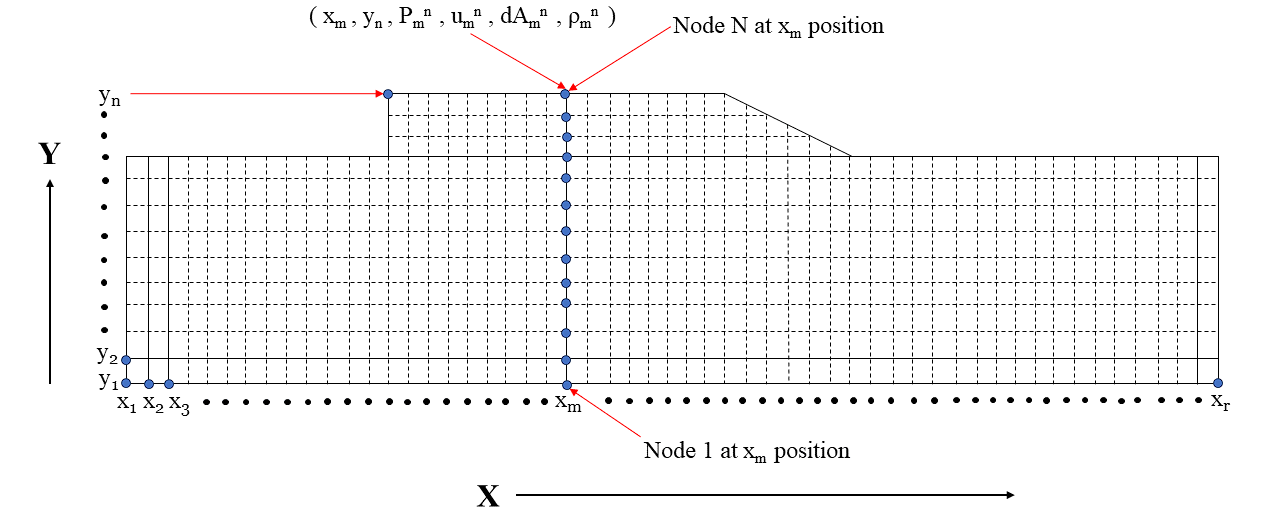

During the simulation, the maximum width and the height of the ignitor have been divided into (r-1) and (n-1) segments respectively. Vertical and horizontal lines have been drawn from the corner points of each segment and intersections of these lines are the nodal points. Data have been collected from each nodal point and we are using these data. We have denoted the points on the width ( x-axis ) as $x_{1}$, $x_{2}$, $x_{3}$ $........$ $x_{r}$ respectively and the points on the height ( y-axis ) to be $y_{1}$, $y_{2}$, $y_{3}$ $........$ $y_{n}$ respectively. 

For ```each particular x-position```, numerical integration is performed by dividing the numerator term with the denominator term. The ```numerator term``` is obtained by ```summing up the product``` of local total pressure, local density of the fuel, local x-velocity of the flow field and local cross-sectional area perpendicular to the flow field, while the ```denominator term``` is calculated by ```summing up the product``` of local density of the fuel, local x-velocity of the flow field and local cross-sectional area perpendicular to the flow field. The result is then ```normalized``` by dividing with ```reference total pressure```.


For instance, for horizontal position $x_{m}$, there are **N** number of nodes ( for each N number of y positions ) which have been shown by the ```blue``` dots. Node 1 is located at position ($x_{m}$ , $y_{1}$), Node 2 is located at position ($x_{m}$ , $y_{2}$) and similarly, Node N is located at position ($x_{m}$ , $y_{n}$). Now, the local total pressure, local density, local velocity and local cross-sectional area at Node 1 can be expressed as, $P_{om}^{1}$ , $\rho_{m}^{1}$ , $u_{m}^{1}$ and $dA_{m}^{1}$ respectively. Similarly, these terms at Node 2 , $......$ , and Node N can be expressed as, ( $P_{om}^{2}$ , $\rho_{m}^{2}$ , $u_{m}^{2}$, $dA_{m}^{2}$ ) , $......$ , and ( $P_{om}^{n}$ , $\rho_{m}^{n}$ , $u_{m}^{n}$, $dA_{m}^{n}$ ) respectively. Therefore, for x-position $x_{m}$ , ```total pressure recovery``` can be calculated as,

$$ \Bigg[P_{o}^{rec}\Bigg]_{x_{m}} 
= {\frac {1}{{P_{o,}}_{ref}}}
\frac {(P_{om}^{1} \rho_{m}^{1} u_{m}^{1} dA_{m}^{1}+P_{om}^{2} \rho_{m}^{2} u_{m}^{2} dA_{m}^{2}+.....+P_{om}^{n} \rho_{m}^{n} u_{m}^{n} dA_{m}^{n})} 
{( \rho_{m}^{1} u_{m}^{1} dA_{m}^{1} + \rho_{m}^{2} u_{m}^{2} dA_{m}^{2}+.....+ \rho_{m}^{n} u_{m}^{n} dA_{m}^{n} )} 
= {\frac {1}{{P_{o,}}_{ref}}}
\frac 
{\sum \limits_{i=1}^{n} P_{om}^{i} \rho_{m}^{i} u_{m}^{i} dA_{m}^{i}} 
{\sum \limits_{i=1}^{n}\rho_{m}^{i} u_{m}^{i} dA_{m}^{i}}
$$

Now, we will write a code to generate a function which can calculate the total pressure recovery at each x-location by using the above equation. But before that, we will find out the unique x-coordinates from the DataFrame.

**Unique X-Coordinates:**

In [10]:
# Calculating number of unique x_data along the streamwise direction(x_direction)

row_num = data.shape[0]   # Returns the number of rows
print("Row Number: {}".format(row_num))

x_dataset = pd.DataFrame(columns=['unique_x_coordinate'])
i=0

for n in range(row_num):
    if n < (row_num-1):
         if data['x_coordinate'].values[n] != data['x_coordinate'].values[n+1]:
                x_dataset.loc[i,"unique_x_coordinate"] = data['x_coordinate'].values[n]
                i=i+1
    elif n==(row_num-1):
        x_dataset.loc[i,"unique_x_coordinate"] = data['x_coordinate'].values[row_num-1]

x_dataset


Row Number: 120481


,unique_x_coordinate
0,0.0
1,0.000107
2,0.000218
3,0.000332
4,0.000449
...,...
546,0.195988
547,0.196977
548,0.197975
549,0.198983


We will now generate a ```Class``` to determine total pressure recovery.

In [11]:
# Class for performing numerical integration at individual streamwise(x) location.

class Thrust_Gain_Scramjet():
    def __init__(self,data,x_dataset):
        self.x_dataset = x_dataset
        self.data = data
        self.row_unique = x_dataset.shape[0]
        self.Result_dataset = pd.DataFrame(columns=['x_coordinate','Total_Pressure_Recovery'])
        
    # cal_dataset refers to calculation dataset    
    def pressure_recovery_calculator(self):
        print("Performing Calculations... Please Wait ...")
        for ii in range(self.row_unique):
            self.cal_dataset = self.data[self.x_dataset.loc[ii,"unique_x_coordinate"]==self.data.loc[:,"x_coordinate"]]
            self.cal_dataset = self.cal_dataset.reset_index(drop=True)
            self.cal_dataset_row = self.cal_dataset.shape[0]
                    
            #Finding Area
            for kk in range(self.cal_dataset_row):
                if kk>0 :
                    self.cal_dataset.loc[kk,'y_difference'] = (self.cal_dataset.loc[kk,'y_coordinate']
                                                               -self.cal_dataset.loc[kk-1,'y_coordinate'])
                elif kk==0:
                    self.cal_dataset.loc[kk,'y_difference'] = self.cal_dataset.loc[kk,'y_coordinate']
            
            for m in range(self.cal_dataset_row):
                if m==0 :
                    self.cal_dataset.loc[m,'dA'] = self.cal_dataset.loc[m,'y_difference']/2
                elif m < (self.cal_dataset_row - 1):
                    self.cal_dataset.loc[m,"dA"] = (self.cal_dataset.loc[m,'y_difference']
                                                    +self.cal_dataset.loc[m+1,'y_difference'])/2
                elif m == (self.cal_dataset_row-1) :
                    self.cal_dataset.loc[m,'dA'] = self.cal_dataset.loc[m,'y_difference']/2
            
            # Integral Individual Result Data (total pressure recovery terms corresponding to each x_coordinate)
            for p in range(self.cal_dataset_row):
                self.cal_dataset.loc[p,'total_pressure_recovery_numerator'] = (self.cal_dataset.loc[p,'density']*
                    self.cal_dataset.loc[p,'x_velocity']*self.cal_dataset.loc[p,'Total_Pressure']*self.cal_dataset.loc[p,'dA'])
                self.cal_dataset.loc[p,'total_pressure_recovery_denominator'] = (self.cal_dataset.loc[p,'density']*
                                                   self.cal_dataset.loc[p,'x_velocity']*self.cal_dataset.loc[p,'dA'])
    
            self.total_numerator = sum(self.cal_dataset.loc[:,'total_pressure_recovery_numerator'])
            self.total_denominator = sum(self.cal_dataset.loc[:,'total_pressure_recovery_denominator'])
            self.total_result = self.total_numerator/self.total_denominator
    
    
    
            self.Result_dataset.loc[ii,'x_coordinate'] = self.x_dataset.loc[ii,'unique_x_coordinate']
            self.Result_dataset.loc[ii,'Avg_total_pressure'] = self.total_result
        
        # Finding maximum pressure to calculate total pressure recovery
        self.max_pressure = self.Result_dataset['Avg_total_pressure'].max()
        self.Result_dataset.loc[:,'Total_Pressure_Recovery']=self.Result_dataset.loc[:,'Avg_total_pressure']/self.max_pressure        
        print("\033[92mCalculation Completed!")

        return self.Result_dataset
    

In [12]:
# Calculating the mixing efficiency

Result_calculator = Thrust_Gain_Scramjet(data,x_dataset)
Result_dataset = Result_calculator.pressure_recovery_calculator()
Result_dataset

Performing Calculations... Please Wait ...
Calculation Completed!


,x_coordinate,Total_Pressure_Recovery,Avg_total_pressure
0,0.0,1.000000,1.102061e+08
1,0.000107,0.996940,1.098689e+08
2,0.000218,0.994888,1.096427e+08
3,0.000332,0.992985,1.094330e+08
4,0.000449,0.991156,1.092314e+08
...,...,...,...
546,0.195988,0.143358,1.579891e+07
547,0.196977,0.143196,1.578102e+07
548,0.197975,0.143045,1.576444e+07
549,0.198983,0.142875,1.574567e+07


### 5. Share ( Result Summarization, Visualization, Recommendations ):
Let us plot the result dataset across the streamwise location to visualize the total pressure recovery. Inspecting the curve, we will be able to find out about how well the scramjet would generate thrust.

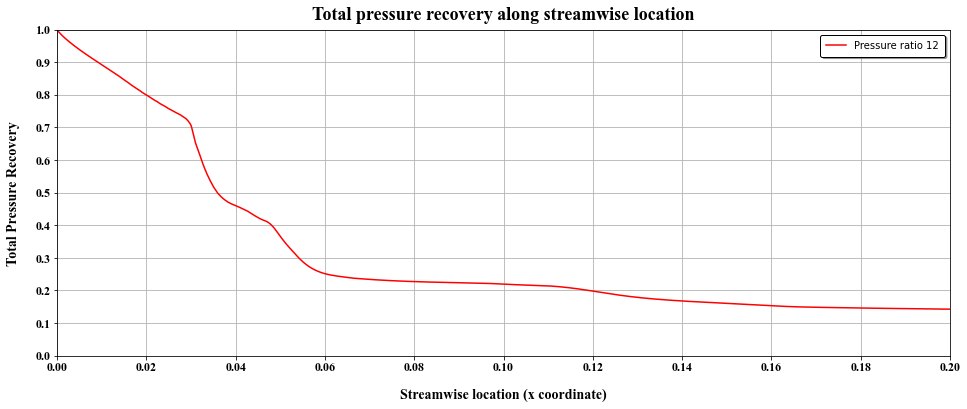

In [13]:
# Plotting the final graph

# Extracting the result_dataset
x_data = Result_dataset.loc[:,'x_coordinate']
y_data = Result_dataset.loc[:,"Total_Pressure_Recovery"]

# Specifying the fonts and fontproperties for title,labels and ticks
font = {'family': ['Times New Roman','sherif'],
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }
font_tick = {
    "family":"Times New Roman",
    "size":12,
    "weight":"heavy",
    "style":"normal"
}

# Plotting the result_data
plt.figure(figsize=(16,6))
plt.plot(x_data,y_data,"r")

# Manipulating the title, labels and legend
plt.title("Total pressure recovery along streamwise location",fontdict=font,size=18,fontweight='bold',pad=10)
plt.xlabel('Streamwise location (x coordinate)',fontdict=font,labelpad=15)
plt.ylabel('Total Pressure Recovery',fontdict=font,labelpad=15)
plt.legend(["Pressure ratio 12"],loc="upper right",shadow=True,edgecolor='black',borderpad=0.6,prop={'weight':"normal"})

# Rearranging and specifying the ticks
plt.xticks(np.arange(0,0.200003,0.02),fontproperties=font_tick)
plt.yticks(np.arange(0,1.01,0.1),fontproperties=font_tick)

# Specifying the limits and generating grids
plt.xlim(0,0.2)
plt.ylim(0,1)
plt.grid(True)

# Showing the plot
plt.show()


#### Key Takedowns:
* Total pressure recovery steps down significantly at the fuel entrance  location.
* At streamwise location ```x = 0.06```, total pressure recovery reduces to ```25%``` and at ```x = 0.12```, total pressure recovery reduces to ```20%```.
* At exit of the chamber, total pressure recovery is ```15%```. So, the pressure loss is much higher and hence, the magnitude of the thrust produced by the scramjet would be ```small```.
* Emphasis should be given to reduce pressure loss from x = 0.03 to x = 0.06 streamwise zone.

###  6. Act ( Implementation, Decision Making and Feedback on Model ):
In the final phase of the Data Analytics project, it's time for decision making. The key takedowns pretty much explains the fact that the present scenerio is not a favourable one for greater thrust production. Hence, after getting this information, the research team leader decides to take an alternative approach to find better case scenerio. ( possibly chaning fuel injection configuration or inlet condition )

## Resources:

To explore the notebook, **visit : [github](https://github.com/Mahbub1807/Personal-Project/blob/main/Total_Pressure_Recovery_Using_Python.ipynb)**

Export the datasets from the following cell. 

In [14]:
# Extract the output file

from IPython.display import display
import ipywidgets as widgets

def download_result(event):
    data.to_csv("C:/Users/mahbu/Downloads/Input_dataset.csv")
    print("\033[92m Input Dataset Downloaded Successfully!")
    Result_dataset.to_csv("C:/Users/mahbu/Downloads/Result_PR120P.csv")
    print("\033[92m Total Pressure Recovery Result Dataset Downloaded Successfully!")
    
csv_download_button = widgets.Button(description='Export Data',disabled=False,
                                     style=dict(button_color='#d7dadd',font_weight='bold'))
csv_download_button.on_click(download_result)
display(csv_download_button)

Button(description='Export Data', style=ButtonStyle(button_color='#d7dadd', font_weight='bold'))

 Input Dataset Downloaded Successfully!
 Total Pressure Recovery Result Dataset Downloaded Successfully!


## Authors:

[<b>Md. Mahbub Talukder,](https://www.linkedin.com/in/mahbub-talukder-a853a5184/)<br>
BSc. in Mechanical Engineering,<br>
Bangladesh University of Engineering and Technology.